In [21]:
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from data_providers import MNISTDataProvider
from data_providers import  CIFAR100DataProvider
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
batch_size=128
seed=1
rng = np.random.RandomState(seed=seed)  # set seed
train_data = CIFAR100DataProvider(which_set="train", batch_size=batch_size, rng=rng, random_sampling=True)
val_data = CIFAR100DataProvider(which_set="valid", batch_size=batch_size, rng=rng)
test_data = CIFAR100DataProvider(which_set="test", batch_size=batch_size, rng=rng)

agg = AgglomerativeClustering(n_clusters=2, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward')

n=train_data.inputs.shape[0]
X = train_data.inputs.reshape(train_data.inputs.shape[0], train_data.inputs.shape[1]*train_data.inputs.shape[2]*train_data.inputs.shape[3])
print(X[:n, :].shape, train_data.targets.shape)
agg.fit(X[:n, :], y=train_data.targets[:n])
print('Done fitting\n')


pred = agg.fit_predict(X[:n,:])
print('Done predicting\n')

print(pred, train_data.targets[:n])
print(sum(pred))

#http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py

from itertools import cycle, islice
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(pred) + 1))))

n=200
X1 = train_data.inputs[:n, :, : , :]
plt.scatter(X1[:n, 0], X1[:n,1], s=4, color=colors[pred])
plt.show()

In [3]:
centroid = list(np.zeros((100)))
for c in np.arange(100):
    tf = train_data.targets == c
    index = np.where(tf)[0]
    centroid[c] = np.mean( np.take(train_data.inputs, index, axis=0), axis=0)
    print(c)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [194]:
#print(centroid)


#tf = train_data.targets == 100
#index = np.where(tf)[0]
#print(index)
print(train_data.inputs.shape, index.shape)
print(np.take(train_data.inputs, index, axis=0).shape)
print(centroid[-1])

(42500, 32, 32, 3) (431,)
(431, 32, 32, 3)
[[[ 0.48481858  0.49421754  0.47554672]
  [ 0.48500973  0.49379921  0.47655672]
  [ 0.48815793  0.4971658   0.48005992]
  ..., 
  [ 0.46897769  0.47827661  0.45998782]
  [ 0.46905053  0.47814029  0.45929638]
  [ 0.47193497  0.48056066  0.46181679]]

 [[ 0.48531899  0.49398094  0.4744367 ]
  [ 0.48221639  0.48932254  0.47118855]
  [ 0.48730278  0.49454534  0.47713003]
  ..., 
  [ 0.46681219  0.47273561  0.45447394]
  [ 0.46746728  0.47488284  0.45578411]
  [ 0.46956003  0.47756702  0.45826808]]

 [[ 0.48869455  0.49633759  0.47503704]
  [ 0.48530093  0.49150628  0.47057885]
  [ 0.48961389  0.49513662  0.47478256]
  ..., 
  [ 0.47370899  0.47723937  0.45821354]
  [ 0.47223499  0.47762141  0.45771301]
  [ 0.47474632  0.48173428  0.46141633]]

 ..., 
 [[ 0.48113376  0.48473686  0.46531063]
  [ 0.47773096  0.47827664  0.45881405]
  [ 0.48026946  0.47978714  0.46112528]
  ..., 
  [ 0.47738513  0.48173422  0.46234438]
  [ 0.47208044  0.47861338  0.45

In [19]:
def clustering(centroid, nr_clusters = 6):
    #agg2 = AgglomerativeClustering(n_clusters=nr_clusters, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward')
    agg2 = SpectralClustering(n_clusters=nr_clusters, eigen_solver=None, random_state=None, affinity='rbf', n_neighbors=10, eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1, kernel_params=None, n_jobs=1)

    centroid = np.array(centroid)
    print(centroid.shape)
    X = centroid.reshape(centroid.shape[0], centroid.shape[1]*centroid.shape[2]*centroid.shape[3])

    '''
    from sklearn.decomposition import PCA
    pca = PCA(n_components=4, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=seed)
    X = pca.fit_transform(X)
    '''
    
    
    agg2.fit(X)
    print('Done fitting\n')

    pred = agg2.fit_predict(X)
    print('Done predicting\n')


    from itertools import cycle, islice
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                                 '#f781bf', '#a65628', '#984ea3',
                                                 '#999999', '#e41a1c', '#dede00']),
                                          int(max(pred) + 1))))

    print(pred,X.shape)
    plt.scatter(X[:, 0], X[:,1], s=34, color=colors[pred], marker='o')
    plt.show()
    new_labels_perDatapoint = new_labels(pred, nr_clusters)
    return new_labels_perDatapoint



In [238]:
mapped = {}

for sc in np.arange(nr_clusters):
    tf = pred == sc
    index = np.where(tf)[0]
    mapped[sc] = index
    print(index)


[12 17 30 49 60 67 68 71 73 76 93 95]
[ 1  2 14 18 21 26 27 33 34 35 38 42 43 44 45 46 50 51 54 62 63 64 65 66 70
 74 75 77 78 79 80 88 92 97 98]
[ 5  7  8  9 10 11 16 22 23 28 29 36 39 40 61 69 84 91 99]
[20 24 41 86]
[ 3  4 13 15 19 25 31 32 37 47 48 52 55 56 58 59 72 81 85 87 89 90 96]
[ 0  6 53 57 82 83 94]


(100, 32, 32, 3)
Done fitting

Done predicting

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] (100, 3072)


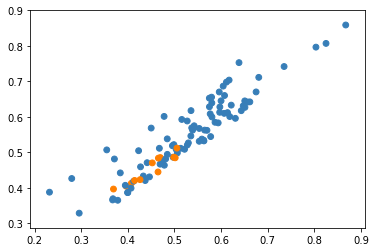

(100, 32, 32, 3)
Done fitting

Done predicting

[1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 2 2 1
 1 0 1 1 1 2 1 0 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 0 1 1 1 1 1 1 1
 1 1 1 2 0 0 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1] (100, 3072)


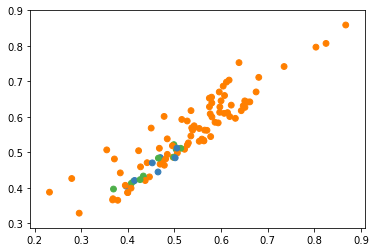

(100, 32, 32, 3)
Done fitting

Done predicting

[0 0 0 2 2 0 0 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 2 0
 0 2 0 0 0 2 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 0 0 0 0 3 0 0
 0 0 0 2 1 1 1 3 0 0 0 0 0 0 2 0 3 0 0 0 0 0 0 0 0 0] (100, 3072)


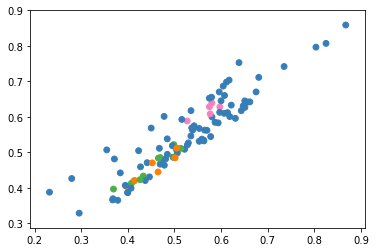

(100, 32, 32, 3)
Done fitting

Done predicting

[0 0 0 4 4 0 0 0 0 0 0 4 3 3 0 0 0 0 4 0 0 0 0 0 0 0 4 1 0 0 0 0 0 0 4 4 0
 0 2 0 0 0 2 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 4 1 0 0 0 0 3 0 0
 0 0 0 2 1 1 1 3 0 0 0 0 0 0 2 0 3 0 0 0 0 0 0 0 0 0] (100, 3072)


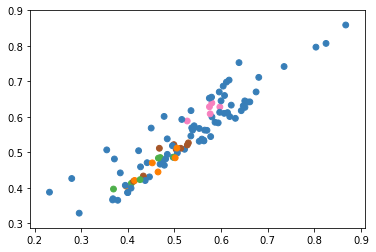

(100, 32, 32, 3)
Done fitting

Done predicting

[0 0 0 3 3 0 0 0 0 0 0 3 0 5 0 0 0 0 3 0 0 0 0 0 0 0 3 2 0 0 0 0 0 0 3 3 0
 0 1 0 0 0 1 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 3 2 0 0 0 0 0 0 0
 0 0 0 1 2 2 2 4 0 0 0 0 0 0 1 5 5 0 0 0 0 0 0 0 0 0] (100, 3072)


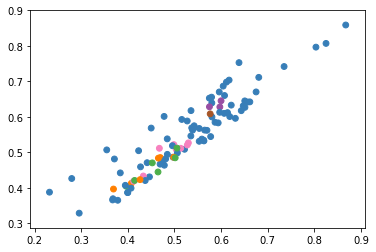

(100, 32, 32, 3)
Done fitting

Done predicting

[0 0 0 2 2 0 0 0 0 0 0 5 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 5 5 0
 0 1 0 0 0 1 0 4 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 5 0 5 1 0 0 0 0 0 0 0
 0 0 0 5 4 4 4 3 0 0 0 0 0 0 1 6 6 0 0 0 0 0 0 0 0 0] (100, 3072)


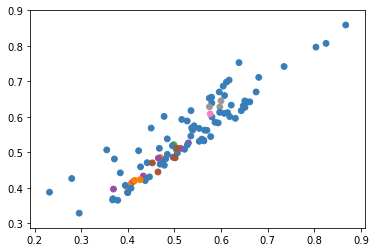

(100, 32, 32, 3)
Done fitting

Done predicting

[4 4 4 2 2 4 4 4 4 4 4 7 4 6 4 4 4 4 7 0 4 4 4 4 4 4 7 1 4 4 4 0 4 4 7 7 4
 4 1 4 4 4 1 4 5 4 4 4 4 4 1 4 4 4 4 0 4 4 4 4 4 4 4 1 4 7 1 4 4 4 4 4 4 4
 4 4 4 1 5 5 5 3 4 4 4 4 4 4 1 6 6 4 4 4 4 4 4 4 4 4] (100, 3072)


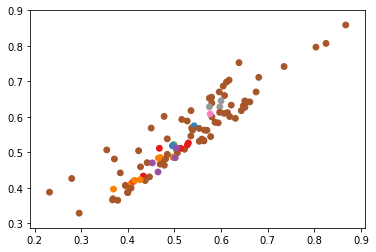

(100, 32, 32, 3)
Done fitting

Done predicting

[2 2 2 3 3 2 2 2 2 2 2 7 2 5 2 2 2 2 7 0 2 2 2 2 2 2 7 8 2 2 2 0 2 2 7 7 2
 2 6 2 2 2 8 7 1 2 2 2 2 2 6 2 2 2 2 0 2 2 2 2 2 2 2 6 2 7 8 2 2 2 2 2 2 2
 2 2 2 6 1 1 1 4 2 2 2 2 2 2 6 5 5 2 2 2 2 2 2 2 2 2] (100, 3072)


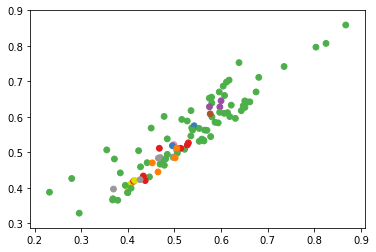

(100, 32, 32, 3)
Done fitting

Done predicting

[0 0 0 2 2 0 0 0 0 0 0 6 8 4 0 0 0 0 6 5 0 0 0 0 0 0 6 9 0 0 0 5 0 0 6 6 0
 0 1 0 0 0 1 6 3 0 0 0 0 0 1 0 0 0 0 5 0 0 0 0 0 0 0 1 0 6 9 0 0 0 0 8 0 0
 0 0 0 1 3 9 3 7 0 0 0 0 0 0 1 4 4 0 0 0 0 0 0 0 0 0] (100, 3072)


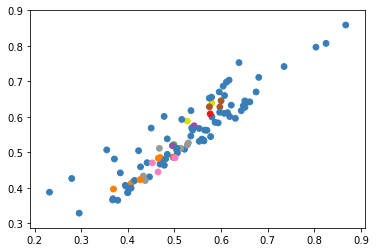

(100, 32, 32, 3)
Done fitting

Done predicting

[ 0  0  8  3  3  0  0  0  8  0  8  8  0  9  0  8  0  0  8 10  0  0  0  0  0
  0  8  7  0  0  0 10  8  0  6  8  0  0  4  0  0  0  2  0  1  8  0  0  0  0
  4  0  0  0  0 10  0  0  0  0  0  0  0  2  0  6  7  0  0  0  0  0  0  0  0
  0  0  4  1  1  1  5  0  0  8  0  0  0  2  9  9  0  0  0  0  0  0  0  8  8] (100, 3072)


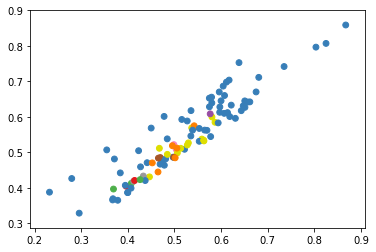

(100, 32, 32, 3)
Done fitting

Done predicting

[ 0  0  0  3  3  0  0  0  6  0  6 10 11  8  0  6  0  0 10  0  0  0  0  0  0
  0 10  1  0  0  0  0  6  0  9 10  0  0  7  0  0  0  4  0  2 10  0  0  0  0
  7  0  0  0  0  0  0  0  0  0  0  0  0  4  0  9  1  0  0  0  0 11  0  0  0
  0  0  7  2  2  2  5  0  0  0  0  0  0  4  8  8  0  0  0  0  0  0  0 10  0] (100, 3072)


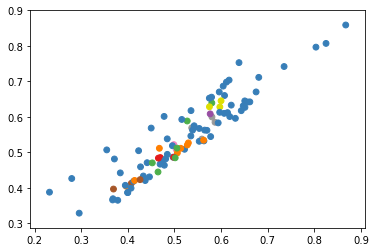

(100, 32, 32, 3)
Done fitting

Done predicting

[ 0  0  0  3  3  0  0  0  7  0  7 11  9  8  0  7  0  0 11 12  0  0  0  0  0
  0 11  6  0  0  0 12  7  0 10 11  0  0  4  0  0  0  2  0  1  0  0  0  0  0
  4  0  0  0  0 12  0  0  0  0  0  0  0  2  0 10  6  0  0  0  0  9  0  0  0
  0  0  4  1  1  1  5  0  0  0  0  0  0  2  8  8  0  0  0  0  0  0  0 11  0] (100, 3072)


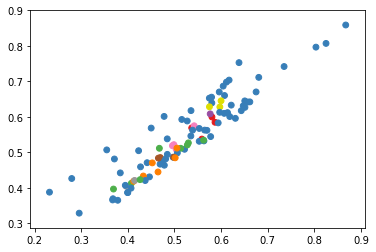

(100, 32, 32, 3)
Done fitting

Done predicting

[ 1  1  1  3  3  1  1 10  7  1  7 11 12  9  1  7 10  1 11 13  1  1  1  1  1
  1 11  0  1 10  1 13  7  1  8 11  1  1  4  1  1  1  6  1  2 11  1  1  1  1
  4  1  1  1  1 13  1  1  1  1  1  1  1  6  1  8  0  1  1  1  1 12  1  1  1
  1  1  4  2  2  2  5  1  1  1  1  1  1  6  9  9  1  1  1  1  1  1  1 11  1] (100, 3072)


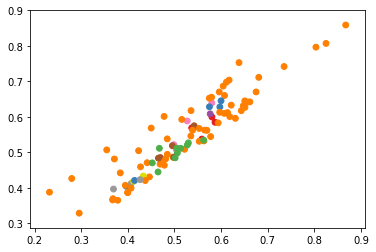

(100, 32, 32, 3)
Done fitting

Done predicting

[ 4  4  4  3  3  4  4  4 11  4 11  8 14 10  4 13  4  4  4  0  4  4 11  4  4
  0  4  2 11  4  4  0 13  4  9  8  4  4  6 11  4  4  2  4  1  4  4  4  4  4
  6  4  4  4  4  0  4  4  0  4  4  4  4  5  4  9  2  4  4  4  4 14  0  4  4
  4  4  7  1  1  1 12  4  4 11  4  4  0  5 10 10  4  4  4  4  4  4  4 11 11] (100, 3072)


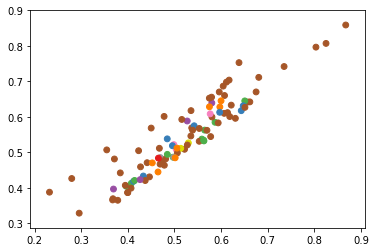

(100, 32, 32, 3)
Done fitting

Done predicting

[ 0  0  0  3  3  0  0  0  8  0  8  7 15 11  0  9  0  0  0 13  0  0  8  0  0
  0  0  2  8  0  0 13  9  0 12  7  0  0  1  8  0  0  2  0 10  0  0  0  0  0
  1  0  0  0  0 13  0  0 13  0  0  0  0  4  0 12  2  0  0  0  0 15 13  0  0
  0  0 14 10  5  5  6  0  0  8  0  0 13  4 11 11  0  0  0  0  0  0  0  7  8] (100, 3072)


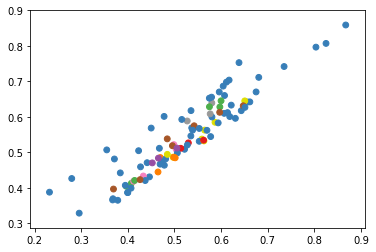

(100, 32, 32, 3)
Done fitting

Done predicting

[ 1  1 15  3  3  1  1  1 13  1 13  5  1 12  1  7  1  1  1 16  1  1 13  1  1
  1 15 11 13  1  1 16  7  1 14  5  1  1 10 13  1  1 11 14  0  1  1  1  1  1
 10  1  1  1  1  9  1  1 16  1  1  1  1  2  1 14 11  1  1  1  1  1 16  1  1
  1  1  4  0  4  6  8  1  1 13  1  1 16  2 12 12  1  1  1  1  1  1  1 15 13] (100, 3072)


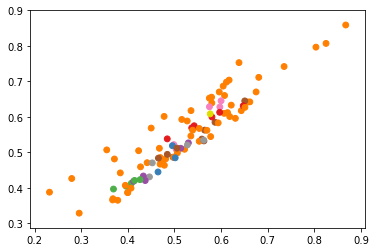

(100, 32, 32, 3)
Done fitting

Done predicting

[ 4  4  4  2  2  4  4  4 16  4 16 10  4 17  4 14  4  4  4  0  4  4 16  4  4
  4  4  7 16  4  4  0 14  4  9 10  4  4  5 16  4  4  7  9  3  4  4  4  4  4
  8  4  4  4  4  0  4  4  0  4  4  4  4  1  4  9 12  4  4  4  4  4  0  4  4
  4  4 15  3 13 13 11  4  4 16  4  4  0  6 17 17  4  4  4  4  4  4  4 10 16] (100, 3072)


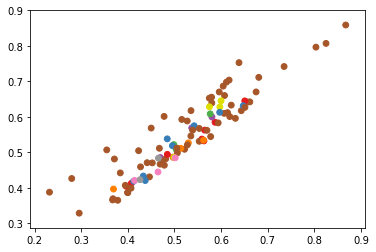

(100, 32, 32, 3)
Done fitting

Done predicting

[ 3  3  3  4  4  3  3  3  0  3  0  7  3 10  3 12  3  3  3 13  3  3  0  3  3
  3  3  9  0  3  3 13 12  3  5  7  3  3 14  0  3  3  9  5  1  3  3  3  3  3
 16  3  3  3  3 17  3  3 15  3  3  3  3 18  3  5  2  3  3  3  3  3 15  3  3
  3  3 11  1  6  6 10  3  3  0  3  3 15  8 10 10  3  3  3  3  3  3  3  7  0] (100, 3072)


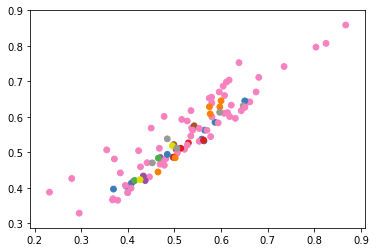

(100, 32, 32, 3)
Done fitting

Done predicting

[ 0  0  0  3  3  0  0  0 12  0  8  6  0 19  0  9  0  0  0 13  0  0  0  0  0
  0  0 16  8  0  0 13  9  0 10  6  0  0 17 12  0  0  5 10  7  0  0  0  0  0
 17  0  0  0  0 14  0  0 14  0  0  0  0  2  0 10 11  0  0  0  0  0 14  0  0
  0  0 18  7  1  1 15  0  0  8  0  0 14  4 19 19  0  0  0  0  0  0  0  6  8] (100, 3072)


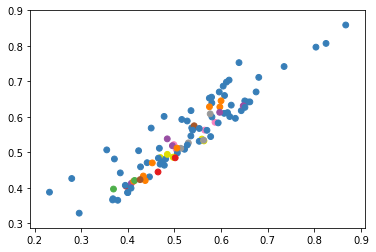

(100, 32, 32, 3)
Done fitting

Done predicting

[ 1  1  1  5  5  1  1  1 19  1 16  8  1 14  1 13  1  1 20 11  1  1  1  1  1
  1  1  7 16  1  1 11 13  1  9  8  1  1  2 19  1  1  7  9 15  1  1  1  1  1
  2  1  1  1  1 12  1  1  1  1  1  1  1  3  1  9 17  1  1  1  1  1 12  1  1
  1  1 18  6 10  0 14  1  1 16  1  1 12  4 14 14  1  1  1  1  1  1  1  8 16] (100, 3072)


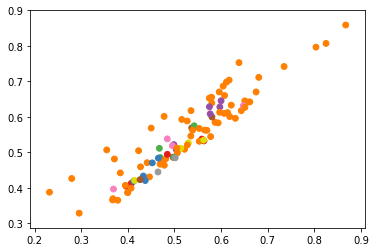

(100, 32, 32, 3)
Done fitting

Done predicting

[ 8  8  8  1  1  8  8  8 19  8 20  4  8 11  8  0  8  8  8 10  8  8  8  8  8
  8  8  6 20  8  8 10  0  8  9  4  8  8 18 19  8  8  6  9  3  8  8  8  8  8
 12  8  8  8  8  5  8  8 21  8  8  8  8 16  8  9 14  8  8  8  8  8  5  8  8
  8  8 13 15  2 17 11  8  8 20  8  8 21  7  8 11  8  8  8  8  8  8  8  4 20] (100, 3072)


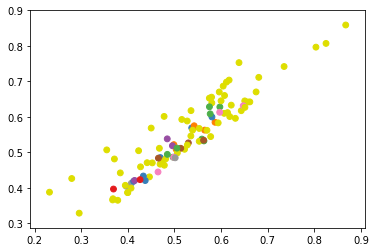

(100, 32, 32, 3)
Done fitting

Done predicting

[ 0  0  0  3  3  0  0  0 19  0 12  5 21 10  0 14  0  0 20 13  0  0 12  0  0
  0  0  6 12  0  0 13 14  0  7  5  0  0  2 19  0  0  6  7 15  0  0  0  0  0
  2  0  0  0  0 11  0  0 22  0  0  0  0 18  0  7  4  0  0  0  0 21 11  0  0
  0  0  1  8 16  9 10  0  0 12  0  0 22 17 10 10  0  0  0  0  0  0  0  5 12] (100, 3072)


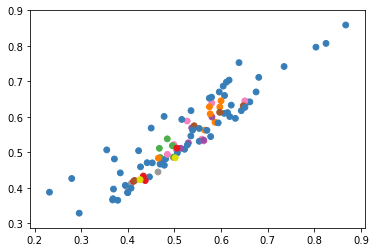

(100, 32, 32, 3)
Done fitting

Done predicting

[ 0  0  0  1  1  0  0  0 20  0 18 23  0 22  0 14  0  0  0 10  0  0  0  0  0
  0  6  4 18  0  0 10 14  0  5  9  0  0  2 20  0  0  4  5 15  6  0  0  0  0
 16  0  0  0  0 11  0  0 21  0  0  0  0 13  0  5 19  0  0  0  0  0 11  0  0
  0  0 17  7  3  3 12  0  0 18  0  0 21  8 22 22  0  0  0  0  0  0  0 23 18] (100, 3072)


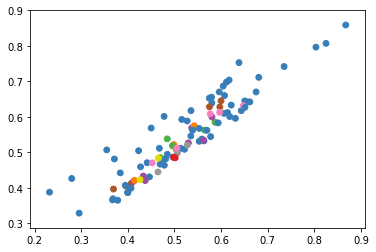

(100, 32, 32, 3)
Done fitting

Done predicting

[ 1  1  1  5  5  1  1  1 24  1 22  7  1 13  1 14  1  1  1 11  1  1  1  1  1
  1  9 15 22  1  1 11 14  1 21  7  1  1  2 24  1  1  8 21 17  9  1  1  1  1
 19  1  1  1  1 12  1  1 18  1  1  1  1  3  1 10 23  1  1  1  1  1 12  1  1
  1  1  0  6 20 16 13  1  1 22  1  1 18  4  1 13  1  1  1  1  1  1  1  7 22] (100, 3072)


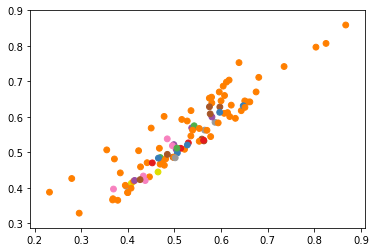

(100, 32, 32, 3)
Done fitting

Done predicting

[ 1  1  1  7  7  1  1  1 24  1 22  5  1 20  1 18  1  1 23  9  1  1  1  1  1
  1 10 13 22  1  1  9 18  1  6  5  1  1 15 24  1  1  4 25 11 10  1  1  1  1
  0  1  1  1  1 12  1  1 21  1  1  1  1  2  1  6 17  1  1  1  1  1 12  1  1
  1  1 16  8 19  3 20  1  1 22  1  1 21 14  1 20  1  1  1  1  1  1  1  5 22] (100, 3072)


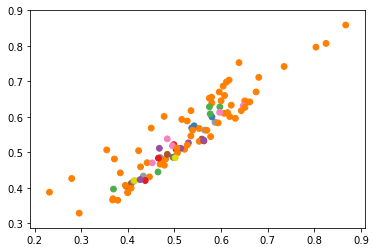

(100, 32, 32, 3)
Done fitting

Done predicting

[ 1  1  1  5  5  1  1  1 23  1 20  9  1 25  1 18  1  1  1 19  1  1  1  1  1
  1 17 15 20  1  1 19 18  1 11  9  1  1 12 23  1  1  8 26 13 17  1  1  1  1
  6  1  1  1  1  0  1  1 22  1  1  1  1  4  1 16 21  1  1  1  1  1  0  1  1
  1  1  3  2 24 10 14  1  1 20  1  1 22  7 25 25  1  1  1  1  1  1  1  9 20] (100, 3072)


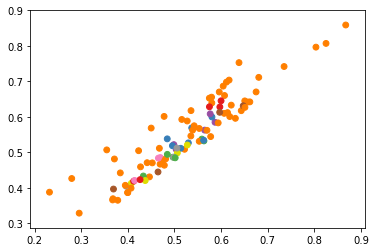

(100, 32, 32, 3)
Done fitting

Done predicting

[ 0  0  0  5  5  0  0  0 27  0 15  9  0 25  0 21  0  0  0 19  0  0  0  0  0
  0 12  2 15  0  0 19 21  0 18  9  0 23 17 27  0  0 16 22 10 12  0  0  0  0
  3  0  0  0  0 13  0  0 26  0  0  0  0 11  0  8 24  0  0  0  0  0 13  0  0
  0  0 14  6 20  1  7  0  0 15  0  0 26  4 23 23  0  0  0  0  0  0  0  9 15] (100, 3072)


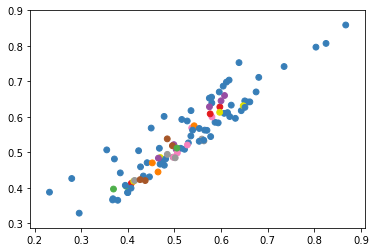

(100, 32, 32, 3)
Done fitting

Done predicting

[ 6  6  6  2  2  6  6  6 21  6 20  8  6 12  6 18  6  6 28 17  6  6  6  6  6
  6 22 13 20  6  6 17 18  6 11  8  6 25 10 21  6  6  5 24  3 22  6  0  6  6
 14  6  6  6  6 16  6  6 27  6  6  6  6  4  6 15 23  6  6  6  6  6 16  6  6
  6  6 19  9  1 26 12  6  6 20  6  6 27  7  6 25  6  6  6  6  6  0  6  8 20] (100, 3072)


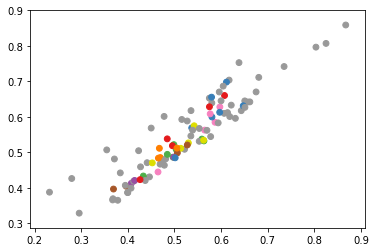

(100, 32, 32, 3)
Done fitting

Done predicting

[ 4  4  4  8  8  4  4  4 22  4  0 28  4 14  4 24  4  4 23 16  4  4  4  4  4
  4 13  9  0  4  4 16 24  4  6 11  4 26 17 22  4  4  3 20 15 13  4  4  4  4
  2  4  4  4  4 18  4  4 27  4  4  4  4 19  4  7  5  4  4  4  4  4 18  4  4
  4  4 21 10  1 25 29  4  4  0  4  4 27 12 26 26  4  4  4  4  4  4  4 28  0] (100, 3072)


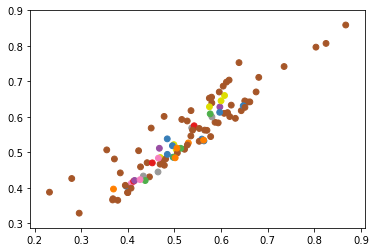

(100, 32, 32, 3)
Done fitting

Done predicting

[ 0  0  0  4  4  0  0  0 21  0 24 28 30 13  0 18  0  0 29 16  0  0  0  0  0
  0 11  6 25  0  0 16 18  0  5  8  0 26 14 21  0  0 19 20 17 11  0  0  0  0
  2  0  0  0  0  9  0  0 27  0  0  0  0 23  0 12  3  0  0  0  0 30  9  0  0
  0  0 15  7  1 22 13  0  0 24  0  0 27 10  0 26  0  0  0  0  0  0  0 28 25] (100, 3072)


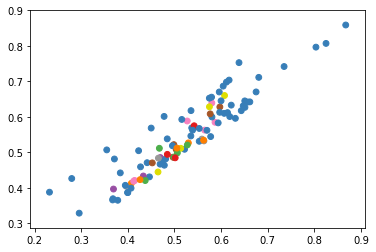

(100, 32, 32, 3)
Done fitting

Done predicting

[ 0  0  0  4  4  0  0  0 26  0 19 31  0 30  0 23  0  0 27 13  0  0  0  0  0
  0 12 16 24  0  0 13 23  0 18 10  0  0 15 26  0  0  6  9  1 12  0  0  0  0
 11  0  0  0  0 14  0  0 25  0  0  0  0 20  0  5  3  0  0  0  0  0 14  0  0
  0  0 21  7  2 22 17  0  0 19  0  0 25  8  0 29  0  0  0  0  0  0  0 28 24] (100, 3072)


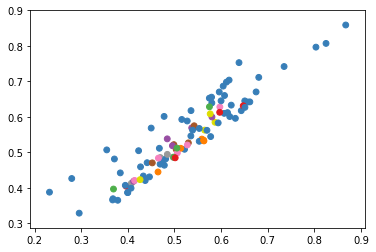

(100, 32, 32, 3)
Done fitting

Done predicting

[ 2  2  2  8  8  2  2  2 28  2 20 13  2 27  2 21  2  2 30 17  2  2 32  2  2
  2  0  5 23  2  2 17 21  2  7 29  2  1 16 28 32  2 15 26 12  0  2  2  2  2
  4  2  2  2  2 19  2  2 25  2  2  2  2 22  2 11  6  2  2  2  2  2 19  2  2
  2  2 18 10 24  3 14  2  2 20  2  2 25  9  2  1  2  2  2  2  2  2  2 31 23] (100, 3072)


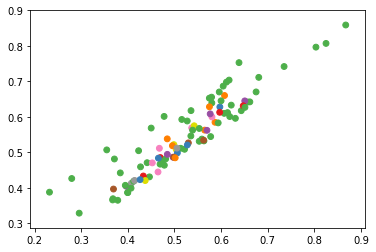

(100, 32, 32, 3)
Done fitting

Done predicting

[ 2  2  2  6  6  2  2  2 28  2 19  9 33 32  2 22  2  2 21 20  2  2 31  2  2
  2 14  3 23  2  2 20 22  2  7 30  2  0 13 28 31  2 16 17  5 14  2  2  2  2
 12  2  2  2  2 18  2  2 29  2  2  2  2 24  2 10  4  2  2  2  2 33 18  2  2
  2  2  8 11  1 26 25  2  2 19  2  2 29 15  0  0  2  2  2  2  2  2  2 27 23] (100, 3072)


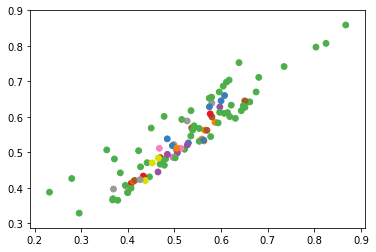

(100, 32, 32, 3)
Done fitting

Done predicting

[14 14  4  7  7 14 14 14 31 14 25 13 34 29  4 21 14 14 30 19 14 14 14 14 14
 14 18  6 24 14 14 19 21 14 15 32 14 14 16 31 14 14 17 28 20 18 14 14 14 14
  1 14 14 14 14 23 14 14  0 14 14 14 14 22  2 11  5 14 14 14 14 34 23 14  4
 14 14 10  9  3 26 12 14 14 25 14 14  0  8 27 27 14 14 14 14 14 14 14 33 24] (100, 3072)


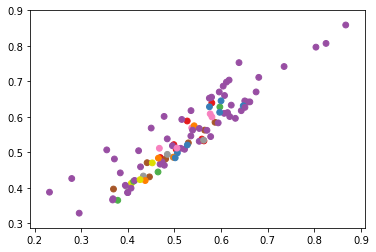

(100, 32, 32, 3)
Done fitting

Done predicting

[ 0  0 26  8  8  0  0  0 29  0 22  9 32 28  0 21  0  0 17 19  0  0  0  0  0
  0 18 14 16  0  0 19 21  0  4 35  0  0  5 29  0  0  3 25  2 34  0  0  0  0
 13  0  0  0  0 20  0  0 30  0  0  0  0  6  0 15 23  0  0  0  0 32 20  0 33
  0  0 10  7 24  1 12  0  0 22  0  0 30 11 27 27  0  0  0  0  0  0  0 31 16] (100, 3072)


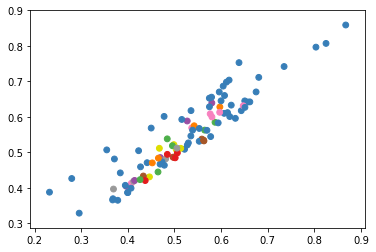

(100, 32, 32, 3)
Done fitting

Done predicting

[ 3  3 28 11 11  3  3  3  0  3 18  8 36 31  3 20  3  3  7 16  3  3 30  3  3
  3 14 23 26  3  3 16 20  3  6 33  3  3 12  0 30  3  4 24  2 35  3  3  3  3
 13  3  3  3  3 21  3  3 27  3  3  3  3 22  3 17  5  3  3  3  3 36 21  3 35
  3  3 19  9  1 25 15  3  3 18  3  3 27 10 29 29  3  3  3  3  3  3 34 32 26] (100, 3072)


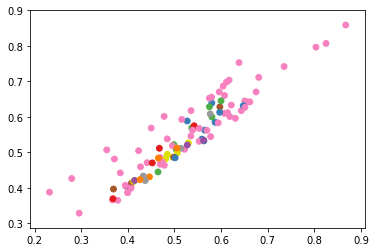

(100, 32, 32, 3)
Done fitting

Done predicting

[ 3  3 30 10 10  3  3  3  0  3 33 29  3 32  3 23  3  3  2 18  3  3 37  3  3
  3 14 16 25  3  3 18 23  3 11 36  3  3  4  0 37  3  6 28 15 31  3  3  3  3
 21  3  3  3  3 19  3  3 27  3  3  3  3 22  3 13  5  3  3  3  3  3 19  3 34
  3  3 12  8  1 17 24  3  3 20  3  3 27  7 26 26  3  3  3  3  3  3 35  9 25] (100, 3072)


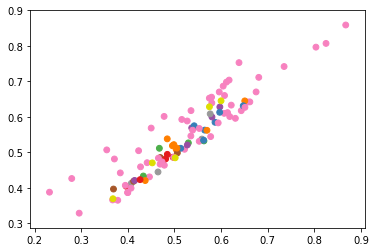

(100, 32, 32, 3)
Done fitting

Done predicting

[28 28 27  7  7 28 28 28 20 28 22 10 37 34 28 24 28 28 21 17 28 28  0 28 28
 28 14  3 25 28 28 17 24 28 13 35 28 28 12 20  0 28 15 29  4 33 28 28 28 28
 19 28 28 28 28 18 28 28 26 28 28 28 28  6  2 11 23 28 28 28 28 37 18 28 36
 28 28  8  9 30  1 16 28 28 38 28 28 26  5 31 31 28 28 28 28 28 28 28 32 25] (100, 3072)


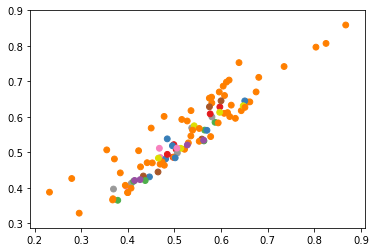

(100, 32, 32, 3)
Done fitting

Done predicting

[ 3  3 31  6  6  3  3  3 29  3 36 35 38 23  3 26  3  3 20 21  3  3 39  3  3
  3 30 16 28  3  3 21 26  3 15 27  3  0 12 29 39  3  5 22  1 19  3  3  3  3
 17  3  3  3  3 18  3  3 33  3  3  3  3 24 37 10  4  3  3  3  3 38 18  3 34
  3  3  8  9 25  2 14  3  3 13  3  3 33  7 32 32  3  3  3  3  3  3  3 11 28] (100, 3072)


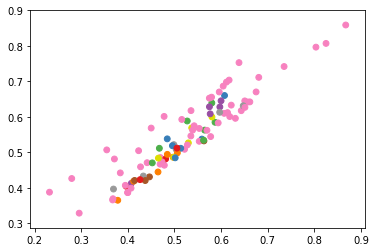

(100, 32, 32, 3)
Done fitting

Done predicting

[ 1  1 30  9  9  1  1  1 28  1 36  8 35 16  1 23  1  1 22  0  1  1 39  1  1
  1 31  6 20  1  1  0 23  1 18 34  1  1 13 28 39  1 11 21 12 15 38  1  1  1
  3  1  1  1  1 17  1  1 32  1  1  1  1 26 37 14  2  1  1  1  1 35 17  1 33
  1  1 10  7  5 25 29  1  1 19  1  1 32  4 27 27  1  1  1  1  1  1 40 24 20] (100, 3072)


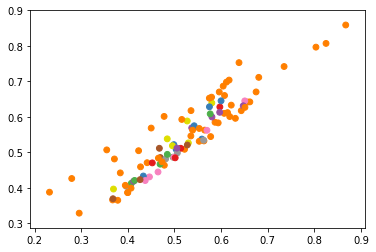

(100, 32, 32, 3)
Done fitting

Done predicting

[ 0  0 27  6  6  0  0 41 28  0 40 35 33 32  0 22  0  0 17 20  0  0 37  0  0
  0 16 11 23 41  0 20 22  0 10  7  0  0 13 28 37  0  5 24  2 30 36  0  0  0
 14  0  0  0  0 19  0  0 31  0  0  0  0 21 38 12  4  0  0  0  0 33 19  0 34
  0  0  9  1 25  3 15  0  0 18  0  0 31  8 26 26  0  0  0  0  0  0 39 29 23] (100, 3072)


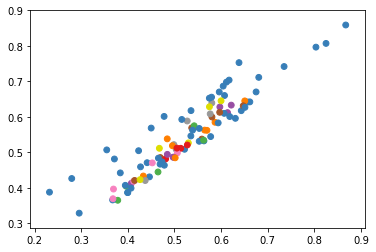

(100, 32, 32, 3)
Done fitting

Done predicting

[ 3  3 29  4  4  3  3 41 21  3 36 34 38 32  3 17  3  3 18 19  3  3  0  3  3
  3 15 16 25 41  3 19 17  3 13  9  3 42 10 21  0  3  2 30  5 27 37  3  3  3
 20  3  3  3  3 23  3  3 31  3  3  3  3 22 39 12  6  3  3  3  3 38 23  3 35
  3  3  8 11  1 28 14  3  3 24  3  3 31  7 26 26  3  3  3  3  3  3 40 33 25] (100, 3072)


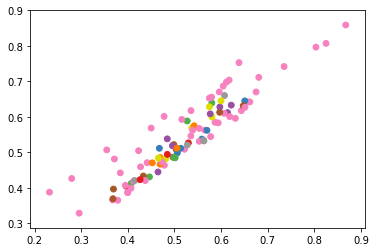

(100, 32, 32, 3)
Done fitting

Done predicting

[ 0  0 28  5  5  0  0 42 31  0 26  9 35 17  0 21  0  0 16 19  0  0 38  0  0
  0 14 12 23 42  0 19 21  0  6 30  0 43 15 31 38  0  3 20  2 32 40  0  0  0
 10  0  0  0  0 18  0  0 22  0  0  0  0 27 37 13  4  0  0  0  0 35 18  0 36
  0  0  7  8  1 24 29  0  0 34  0  0 22 11 39 25  0  0  0  0  0  0 41 33 23] (100, 3072)


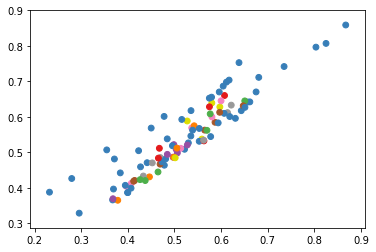

(100, 32, 32, 3)
Done fitting

Done predicting

[ 2  2 29  7  7  2  2 36 30  2 17 35 34 23  2 21  2  2 19  0  2  2 40  2  2
 44 14 16 28 36  2  0 21  2 12 11  2 43 13 30 40  2  6 26 18 32 39  2  2  2
  4  2  2  2  2 20  2  2 33  2  2  2  2 24 38  9  3  2  2  2  2 34 20  2 25
  2  2  5  8  1 27 15  2  2 37  2  2 33 10 42 22  2  2  2  2  2  2 41 31 28] (100, 3072)


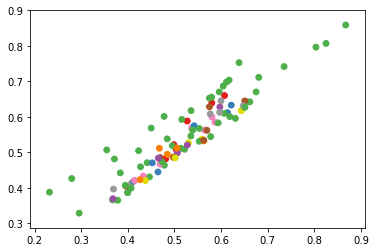

(100, 32, 32, 3)
Done fitting

Done predicting

[ 5  5 28  3  3  5  5 40 27  5 22  8 39 17  0 26  5  5 24 18  5  5 38  5  5
 45 15  6 25 40  5 18 26  5  9 34  5 43 10 27 38  5 14 23  2 33 44  5  5  5
 16  5  5  5  5 19  5  5 31  5  5  5  5 21 36 13  4  5  5  5  5 39 19  5 42
  5  5 12 11  1 30 32  5  5 37  5  5 31  7 41 20  5  5  5  5  5  5 35 29 25] (100, 3072)


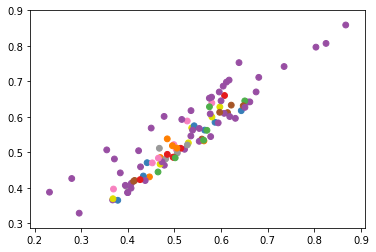

(100, 32, 32, 3)
Done fitting

Done predicting

[36 36 27  8  8 10 36 41 33 36 38 35 39 29 43 24 36 36 12 20 36 36 37 36 36
 10 18  3 25 41 36 20 24 36 11 13 36 45  7 33 37 36 14 17 19 30 40 36 36 36
  2 36 36 36 36 23 36 36 28 36 36 36 36 22 42 16  5 36 36 36  0 39 23 36 32
 36 36 15  4 31  1  9 36 36 21 36 36 28  6 44 26 36  0 36 36 36 36 46 34 25] (100, 3072)


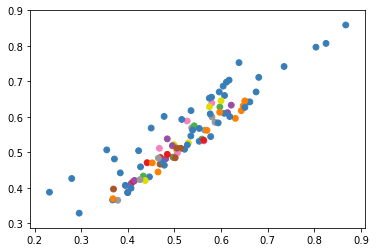

(100, 32, 32, 3)
Done fitting

Done predicting

[ 5  5 31  4  4  5  5 43 27  5 21 33  0 29 42 23  5  5  8 17  5  5 35  5  5
 47 16 20 26 43  5 17 23  5 15 11  5 44 14 27 35  5  7 25  6 28 40 45  5  5
 12  5  5  5  5 19  5  5 32  5  5  5  5 22 39 10  2  5  5  5  5  0 36  5 34
 42  5 18  3 30  1 13  5  5 38  5  5 32  9 41 24  5  5  5  5  5 45 46 37 26] (100, 3072)


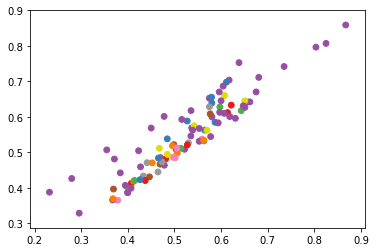

(100, 32, 32, 3)
Done fitting

Done predicting

[ 3  3 33  5  5  3  3 43 28  3 21 31 39 29 46 18  3  3 23 16  3  3 37  3  3
 45 15 13 27 43  3 16 18  3 12 10  3 40  2 28 37  3  6 24 11 36 41  3  3  3
 19  3  3  3  3 25  3  3 30  3  3  3  3 22 35 14  4  3  3  3 47 39 44  3 26
 48  3  7  9  1 20 17  3  3 34  3  3 30  8  0 38  3 47  3  3  3  3 42 32 27] (100, 3072)


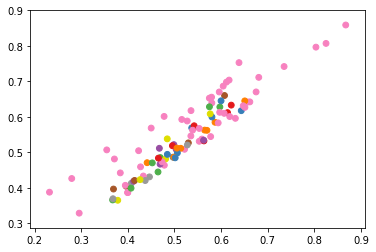

(100, 32, 32, 3)
Done fitting

Done predicting

[ 1  1 29  9  9  1  1 39 32  1 37  8 40 26 43 19  1  1 12 15  1  1 41  1  1
 49 25 16 27 39  1 15 19  1  5 36  1 46 17 32 41  1  2 24 13 21 34 48  1  1
  0  1  1  1  1 22  1  1 30  1  1  1  1 20 33 10  4  1  1  1 42 40 45  1 35
 47  1  6 11  3 28 14  1  1 18  1  1 30  7 44 23  1 42  1  1  1 48 38 31 27] (100, 3072)


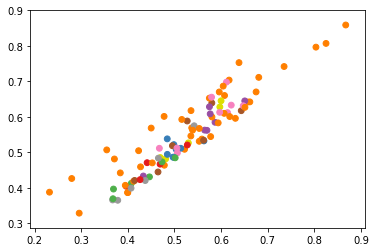

(100, 32, 32, 3)
Done fitting

Done predicting

[ 1  1 29  6  6  1  1 33 34  1 38 26 40 31 46 30 50  1 18 19  1  1 36  1  1
 37 27  5 23 33  1 19 30  1 22 32  1 42 14 34 36  1 13 15  2  0 45 49  1  1
 17  1  1  1  1 20  1  1 28  1  1  1  1  4 39 11 24  1  1  1 47 40 44  1 35
 48  1 10  7 25  3 21  1  1 12  1  1 28  9 41 16  1 47  1  1  1 49 43  8 23] (100, 3072)


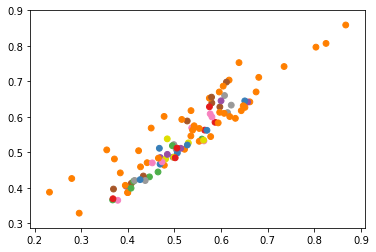

(100, 32, 32, 3)
Done fitting

Done predicting

[ 0  0 29  5  5  0  0 33 30  0 19  9 37 25 46 28 51  0 18 22  0  0 41  0  0
 44 11 16 21 33  0 22 28  0  6 35  0 49 13 48 41  0  3 23  2 27 42 50  0  0
 26  0  0  0  0 45  0  0 34  0  0  0  0  4 40 12 20  0  0  0 39 37 17  0 32
 47  0  7  8 15  1 14  0  0 36  0  0 34 10 43 24  0 39  0  0  0 50 38 31 21] (100, 3072)


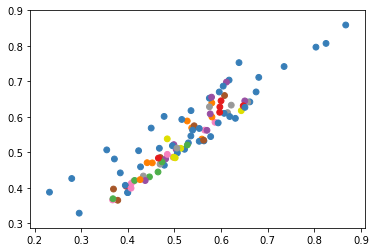

(100, 32, 32, 3)
Done fitting

Done predicting

[ 0  0 30  5  5  0  0 44 24  0 38 26 34 32 43 18 52  0 22 21  0  0 39  0  0
 46 14  1 51 44  0 21 18  0  6  9  0 40 10 50 39  0 12 27  3 29 41 49  0  0
 11  0  0  0  0 17  0  0 36  0  0  0  0 19 37 13  4  0  0  0 48 34 45  0 33
 47  0  7  8  2 31 15  0  0 20  0  0 36 16 42 23  0 48  0  0  0 49 35 28 25] (100, 3072)


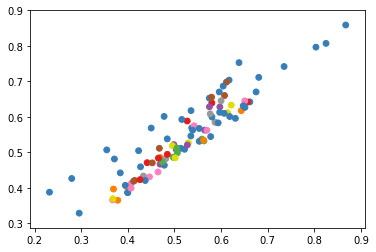

(100, 32, 32, 3)
Done fitting

Done predicting

[ 1  1 30  7  7 53  1 42 31 51 29 34 40 33 46 18 51  1  9 16  1  1 35  1  1
 47 12 17 44 42  1 16 18  1 11  8  1 45  0 52 35  1  4 21  5 37 36 50  1  1
 14  1  1  1  1 15  1  1 32  1  1  1  1 20 38 13  2  1  1  1 49 40 39  1 27
 48  1 22  6 26  3 19  1  1 24  1  1 32 10 43 23  1 49  1  1  1 50 41 28 25] (100, 3072)


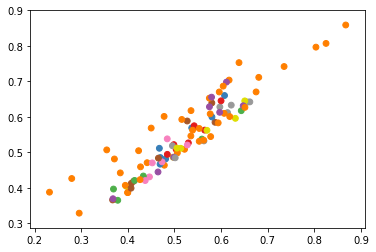

(100, 32, 32, 3)
Done fitting

Done predicting

[ 0  0 26  7  7 54 52 42 51 53 41 35 38 15 46 22 53  0 25 18  0  0 39  0  0
 43 16 14 21 42  0 18 22  0 10 11  0 45  9 34 39  0  2 24  3 31 37 49  0  0
 13  0  0  0  0 19  0  0 30  0  0  0  0 20 36 12  5  0  0  0 48 38 40  0 27
 47  0  6  1 23  4 29  0  0 17  0  0 30  8 28 44  0 48  0  0  0 49 33 32 50] (100, 3072)


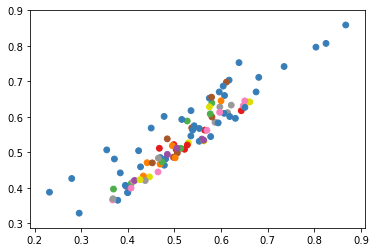

(100, 32, 32, 3)
Done fitting

Done predicting

[ 0  0 29  9  9 53  0 38 31  0 18 11 37 30 46 20 52  0 21 23  0  0 41  0  0
 45 13  4 51 38  0 23 20  0  5 34  0 44  8 50 55  0 16 22 10 26 35 48  0  0
  3  0  0  0  0 43  0  0 32  0  0  0  0 19 36 14  2  0  0  0 49 37 17  0 33
 47  0  6  7  1 27 15  0  0 42  0  0 32 12 40 25 54 49  0  0  0 48 39 28 24] (100, 3072)


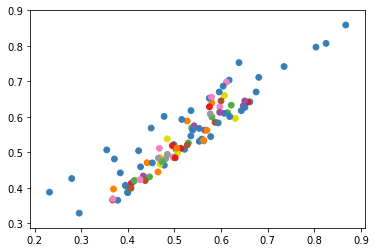

(100, 32, 32, 3)
Done fitting

Done predicting

[ 0  0 27  6  6 54  0 42 31  0 40 36 38 29 44 20 51  0  7 18  0  0 35 55  0
 48 28 13 43 42  0 18 20  0 12 10  0 47 11 49 52  0  5 24  1 15 34 53  0  0
 14  0  0  0  0 19  0  0 32  0  0  0  0  4 39  2 22  0  0 55 50 38 41  0 33
 45  0 16  8 25  3 17  0  0 21  0  0 32  9 46 23 56 50  0  0  0 53 37 30 26] (100, 3072)


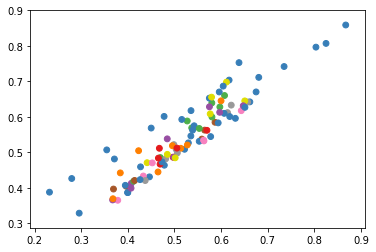

(100, 32, 32, 3)
Done fitting

Done predicting

[ 7  7 33 10 10 47  7 43 26 53 20 36 40 18 45 22 53  7 16 19  7  7 42  7  7
 50 15  4 23 43  7 54 22  7 11 28  7 44 13 51 55  7 17 25  5 30 35 52  7  7
 12  7  7  7  7 46  7  7 37  7  7  7 57 27 38 14  3  7  7  7  1 40 21  7 34
 48  7  9  2 29  6 32  7  7 31  7  7 37  8 39 24 56  1  7  7  7 52 41  0 49] (100, 3072)


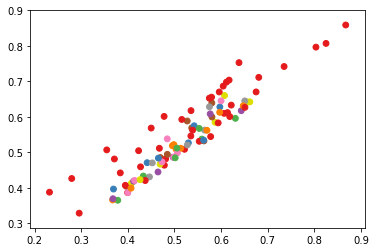

(100, 32, 32, 3)
Done fitting

Done predicting

[10 10 29  8  8 54 10 42 32 10  0 34 37 35 43 24 53 10 19 58 10 10 41 56 10
 45 18  5 49 42 10 27 24 10 14 16 10 47  2 51 52 10 15 25  9 33 36  4 10 10
 17 10 10 10 10 20 10 10 30 10 10 10 57 22 39 13  3 10 10 56 50 37 44 10 28
 46 10 12  7 21  6 23 10 10 40 10 10 30 11  1 48 55 50 10 10 10  4 38 26 31] (100, 3072)


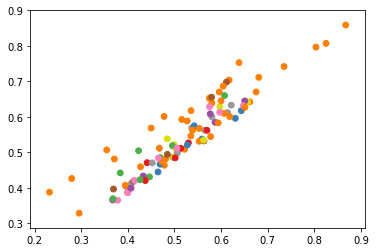

(100, 32, 32, 3)
Done fitting

Done predicting

[ 0  0 26  5  5 56 58 42 30  0 39 31 40 15 36 19 52  0  8 20  0  0 51 59  0
 45 14  3 49 42  0 20 19  0 18 13  0 43 10 48 41  0 11 24 12 22 35 53  0  0
  4  0  0  0  0 17  0  0 32  0  0  0 54 21 38  9  2  0  0 59 57 40 46  0 29
 47  0 16  7  1 27 34  0  0 23  0  0 32  6 44 25 55 50  0  0  0 53 37 33 28] (100, 3072)


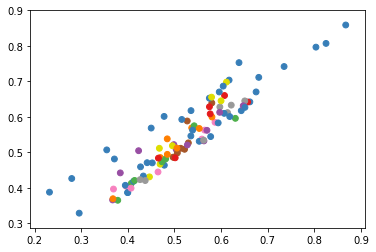

(100, 32, 32, 3)
Done fitting

Done predicting

[15 15 27  9  9 54  2 47 37 53 42 32 38 31  0 26 53 15 17 58 15 15 56 55 15
 49 11 20 24 47 15 18 26 15 16 14 15 43  7 52 44 15  3 22  6 28 35 46 15 15
 10 15 15 15 15 21 15 15 33 15 15 15 59 23 39 13  5 15 15 55 60 38 48 15 36
 45 15 12  4 30  1 19 15 15 25 15 15 33  8 41 34 57 51 15 15 15 46 40 29 50] (100, 3072)


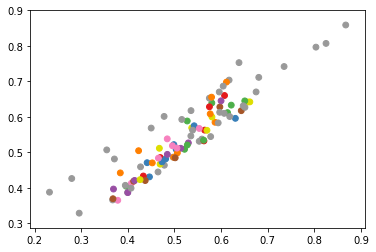

(100, 32, 32, 3)
Done fitting

Done predicting

[ 1  1 27  7  7 53 57 41 51  1 35 22 40 17 39 16 52  1  6 61  1  1 44 58  1
 45 15  3 48 41  1 18 16  1 11 12  1 43 10 34 54  1 13 23  2 33 31 49  1 59
 19  1  1  1  1 21  1  1 36  1  1  1 60 20 42  9  4  1  1 58 55 40 47  1 26
 46  1 14  8  0 25 32  1  1 24  1  1 36  5 37 30 56 50  1  1  1 49 38 29 28] (100, 3072)


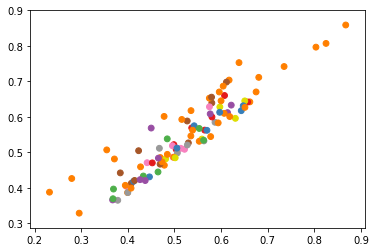

(100, 32, 32, 3)
Done fitting

Done predicting

[26 26 25  4  4 52 61 48 36 56 40 23 39 15 42 28 56 26  5 60 26 26 53 59 26
 50 20  6 43 48 26 19 28 26 13 14 26 45  7 51 46 26 12 18 11 16 29 54 26 62
  2  0 26 26 26 44 26 26 38 26 26 26 58 22 37 10  3 26 26 59 47 39 21 26 33
 49 26 17  8  1 30 34 26 26 24 26 26 38  9 35 31 55 57 26 26 26 54 41 32 27] (100, 3072)


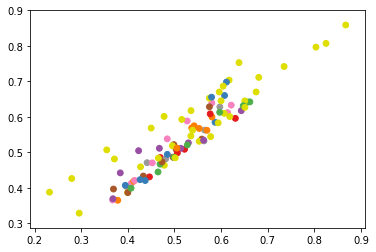

(100, 32, 32, 3)
Done fitting

Done predicting

[ 1  1 23  9  9 54 60 47 53  1 26  0 43 34 45 24 52 63 10 59  1  1 40 58  1
 44 16  2 25 61  1 22 24  1  8 28  1 41  7 35 51  1 14 21  3 33 29 49  1 62
 12  1  1  1  1 20  1  1 37  1 63  1 55 17 38 13  5  1  1 58 50 43 48  1 27
 46  1 18  6  4 30 15  1  1 39  1  1 37 11 31 32 57 56  1  1  1 49 36 19 42] (100, 3072)


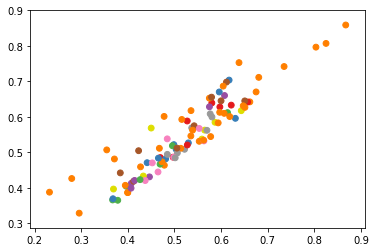

(100, 32, 32, 3)
Done fitting

Done predicting

[ 0  0 23  6  6 55 60 46 35  0 25 15 41 34 40 28 53 64 21 58  0  0 43 61  0
 48 17  3 38 46  0 19 28  0 14 27  0 44  7 51 50  0 13 22  2 29 30 52  0 63
 10 62  0  0  0 45  0  0 39  0 64  0 57 16 42  9  4  0  0 61 56 41 20  0 32
 47  0 11  5 24  1 18  0  0 26  0  0 59  8 31 37 54 49  0  0  0 52 36 12 33] (100, 3072)


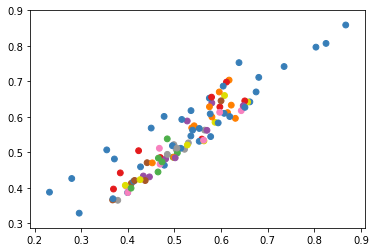

(100, 32, 32, 3)
Done fitting

Done predicting

[ 1  1 24  9  9 53 63 46 51  1 28 14 42 22 47 55 54 65 17 23  1  1 41 60  1
 38 16  6 40 64  1 59 26  1  8 15  1 45 10 33 49  1 19 13  4 30 34 52  1 62
 11  1  1  1  1 21  1  1 61  1 65  1 57 20  0 12  2  1  1 60 50 42 48  1 29
 44  1  7  5  3 25 39  1  1 27  1  1 37 18 35 36 58 56  1  1  1 52 43 31 32] (100, 3072)


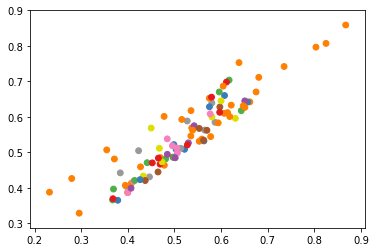

(100, 32, 32, 3)
Done fitting

Done predicting

[ 0  0 28 11 11 53 62 46 34  0 26 13 42 31 39 58 54 65 16 18  0  0 43 60  0
 37 19  4 25 64  0 59 24  0  8 35  0 44  7 50 51  0 14 23  1 17 33 49  0 63
  9 66  0  0  0 21  0  0 61  0 65  0 56 22 40 10  5  0  0 60 57 42 48  0 32
 47  0  6  3  2 27 20  0  0 29  0  0 38 12 36 30 55 52  0  0  0 49 41 15 45] (100, 3072)


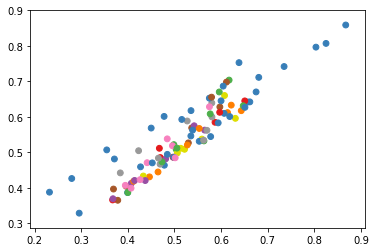

(100, 32, 32, 3)
Done fitting

Done predicting

[36 36 24  0  0 55 63 66 52 36 27 18 43 16 46 59 54 65 19 23 36 36 44  1 36
 42 14  8 41 47 36 60 21 36  5 15 36 49  9 22 53 36 12 20  2 30 32 51 67 64
  6 58 36 36 36 26 36 36 62 36 65 36 61 17 39 13  4 36 36  1 57 43 45 36 28
 48 36  7 10 29  3 35 36 36 25 36 36 33 11 38 37 56 50 36 36 36 51 40 34 31] (100, 3072)


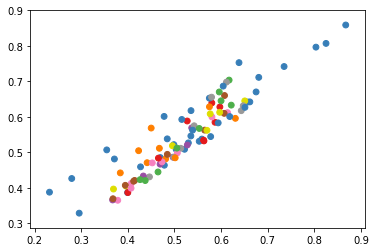

(100, 32, 32, 3)
Done fitting

Done predicting

[ 3  3 16  8  8 54 63 65 38 67 28 17 44 35 41 57 55 68 22 60  3  3 46 62  3
 43 20  7 36 48  3 25 24  3 12 15  3 45  9 50 47  3 11 19  2 31 27 52 66 64
  1 59  3  3  3 49  3  3 61  3 68  3 53 18 39 14  5  3  3 62 56 44 23  3 34
  0  3 13  6  4 29 21  3  3 33  3  3 37 10 30 32 58 51  3  3  3 52 40 26 42] (100, 3072)


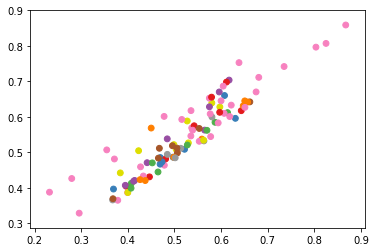

(100, 32, 32, 3)
Done fitting

Done predicting

[ 0  0 28  9  9 53 62 47 52 64 25 16 68 24 43 58 54 67 11 61  0  0 45 60  0
 40 18  5 41 66  0 26 27  0 10 17  0 44  3 36 48  0 13  8  6 23 35 51 69 63
  7 59  0  0  0 22  0  0 65  0 67  0 55 19 38 14  4  0  0 60 49 42 50  0 30
 46  0 12  2 20  1 21  0  0 31  0  0 33 15 37 34 56 57  0  0  0 51 39 29 32] (100, 3072)


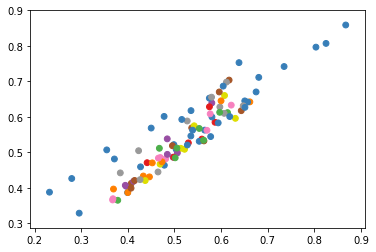

(100, 32, 32, 3)
Done fitting

Done predicting

[ 1  1 24 70  7 54 65 46 38 67 30 19 69 36 45 25 56 66 18 62  1  1 42 60  1
 41 16  5 35 61  1 23 55  1 12 17  1 48  3 51 47  1 10 15  6 26 32 52 68 64
  8 58  1  1  1 22  1  1 33  1 66  1 53 20 39 13  4  1  1 60 49 43 50  1 27
 44  1 11  0 14  2 21  1  1 28  1  1 63  9 34 29 57 59  1  1  1 52 37 31 40] (100, 3072)


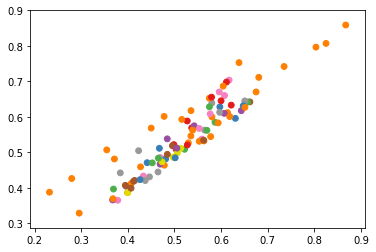

(100, 32, 32, 3)
Done fitting

Done predicting

[ 1  1 26 10 69 53 66 46 34 68 24 13 40 38 44 54 55 63 23 60  1  1 42 64  1
 43 18  5 41 62  1 20 28  1 16 15  1 45  4 50 48  1  9 29  6 21 33 52 67 65
 11 58  1  1  1 25  1  1 35  1 63  1 57  0 37 14 19  1 71 64 59 70 51  1 30
 47  1  8  2  7  3 17  1  1 22  1  1 61 12 36 32 56 49  1  1  1 52 39 27 31] (100, 3072)


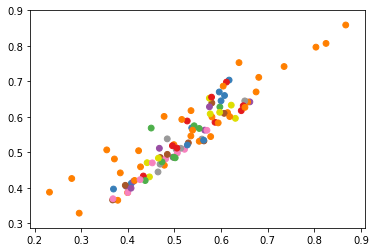

(100, 32, 32, 3)
Done fitting

Done predicting

[ 0  0 25 70 12 53 66 62 51 68 26 13 42 38 44 56 55 67 17 59  0  0 41 63  0
 43 16  7 37 45  0 27 20  0 11 18 72 47  2 34 48  0 10 22  8 31 33 52 65 64
  6 58  0  0  0 28  0  0 36  0 67  0 57  3 40 15 23  0 71 63 61 69 50  0 32
 46  0  1  5  4  9 19  0  0 29  0  0 60 14 30 35 54 49  0  0  0 52 39 24 21] (100, 3072)


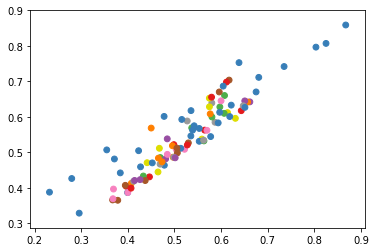

(100, 32, 32, 3)
Done fitting

Done predicting

[ 1  1 27 70 14  0 64 47 37 67 30 16 48 33 44 32 54 66 20 59  1  1 40 61  1
 43 17 10 41 63  1 25 55  1 12 21 72 46  9 52 49  1  7 18  4 23 29 53 68 65
  6 60  1  1  1 28  1  1 38  1 66  1 58 19 42 15  8 73 71 61 50 69 45  1 35
 51  1 11  2  3  5 22  1  1 24  1  1 62 13 31 36 56 57 73  1  1 53 39 26 34] (100, 3072)


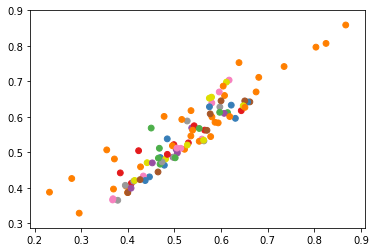

(100, 32, 32, 3)
Done fitting

Done predicting

[ 5  5 27 13 70 54 62 66 37 68 30 22 47 34 40 28 53 67 19 26  5  5 44 63  5
 42 18 10 41  1  5 60 52  5 15 12 72 45  7 51 49  5  9 23 14 25 33 55 64 65
  8 56  5  5  5 48 74  5 35  5 67  5 59 20 43 17  4 73 71 63 57 69 21  5 32
 46  5 11  3  2  6  0  5  5 29  5  5 61 16 39 36 58 50 73  5  5 55 38 24 31] (100, 3072)


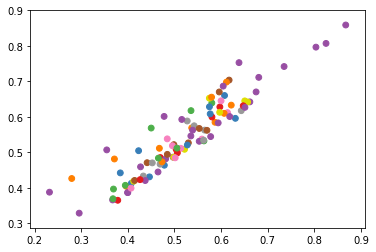

(100, 32, 32, 3)
Done fitting

Done predicting

[ 5  5 27 69 13 56 62 53 34 61 32 18 70 39 44 29 51 67 17 63  5  5 43 64  5
 42 12 10 35  0  5 22 54 75 16 23 72 46  4 55 48  5  8 19  9 26 40 49 68 66
  6 60  5  5  5 47 74  5 65  5 67  5 58  7 37 14 25 73 71 64 59 45 24  5 36
 52  5  3  1  2 11 21  5  5 30  5  5 41 15 33 28 57 50 73  5  5 49 38 20 31] (100, 3072)


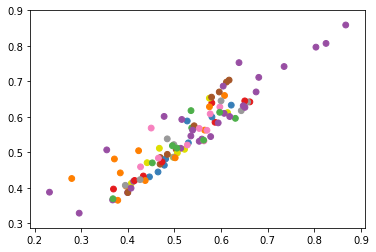

(100, 32, 32, 3)
Done fitting

Done predicting

[76 62 28 69 11 52 70 55 31 61 32 15 68 20 47 25 56 67 16 26 62 62 42 66 62
 39 17  7 37 46 62 64 54 75 12 19 73 44  6 51 49 62 10 18  5 22 36 50 71 65
  8 60 62 62 62 23  0 62 59 62 67 62 58  9 40 14 21 74 72 66 63 43 53 62 34
 45 62  3  2  1  4 33 62 76 29 62 62 35 13 38 30 57 48 74 62 62 50 41 24 27] (100, 3072)


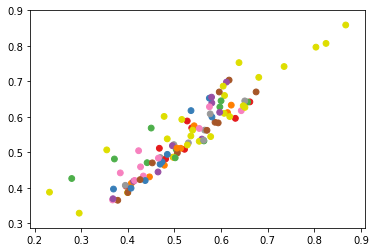

(100, 32, 32, 3)
Done fitting

Done predicting

[76 41 22 72 13 55 61 51 37 62 31 14 70 36 46 57 52 64 24 19 41 41 42 67 41
 43 18  5 38 53 41 66 33 75 12 28 71 45  7 56  0 41  9 23  8 25 32 54 69 68
  4 58 41 41 41 47 74 41 39 41 64 41 63 15 40 16 11 73  6 67 50 48 26 41 35
 49 41 10  2  1  3 27 41 76 21 41 41 59 17 34 30 60 65 73 77 41 54 44 20 29] (100, 3072)


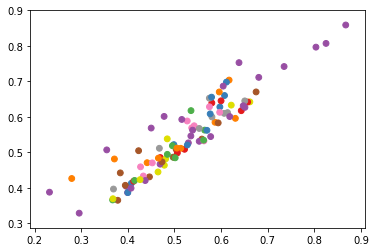

(100, 32, 32, 3)
Done fitting

Done predicting

[77 24 30 12 70 58  0 52 39 63 37 19 46 21 43 27 53 66 10 65 71 71 42 64 71
 48 18  4 36 44 71 23 59 75 13 20 73 45  6 55 51 71  9 25  1 15 34 56 67 68
  7 57 71 71 71 26 76 71 40 71 66 71 60 17 38 16  8 74 72 64 47 69 50 71 33
 49 71  3  5  2 11 31 71 77 29 71 71 61 14 35 28 54 62 74 78 71 56 41 22 32] (100, 3072)


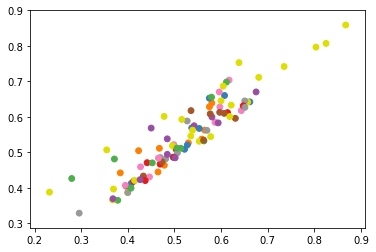

(100, 32, 32, 3)
Done fitting

Done predicting

[76 78 29 70 14 56 65 52 35 57 31 13 69 21 44 27 50 67 18 60  0  0 41 64  0
 40 16 11 38 47  0 22 53 75 10 19 72 43  5 54 49  0  9 20  2 24 37 55 68 66
  6 61  0  0  0 26 74  0 63  0 79  0 59 17 36 12  8 73 71 64 62 46 45  0 33
 48  0  7  1  3  4 34  0 76 32  0  0 39 15 28 25 58 51 73 77  0 55 42 23 30] (100, 3072)


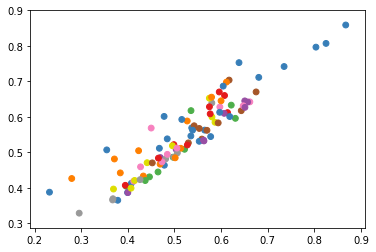

(100, 32, 32, 3)
Done fitting

Done predicting

[76 78 28 70 10 56 65 47 39 62 32 15 69 33 42 27 51 68 20 25  0  0 45 64  0
 40 19  8 38 53  0 63 55 75 11 13 72 46  5 52 49  0  9 16  3 24 36 54 67 66
  7 58  0  0  0 30 74  0 60 80 79  0 61 17 34 18  6 73 71 64 50 43 44  0 31
 48  0 12  2  4  1 21  0 76 26  0  0 41 14 35 22 57 59 73 77  0 54 37 23 29] (100, 3072)


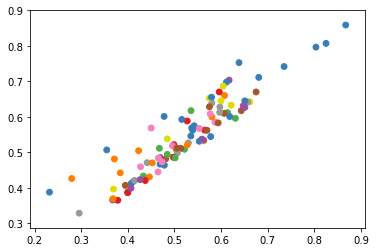

(100, 32, 32, 3)
Done fitting

Done predicting

[81 78 24 14 52  0 67 58 55 65 30 18 48 22 46 60 53 69 20 31 57 57 45 66 57
 39 19  4 38 51 57 34 27 75 13 16 72 47  3 44 56 57  2 26  6 25 37 59 70 68
 10 63 57 57 57 23 74 57 43 80 79 57 62 17 41 15  9 12 73 66 54 71 40 57 33
 50 57  8  5  7  1 36 57 76 29 57 57 49 11 35 28 61 64 12 77 57 59 42 21 32] (100, 3072)


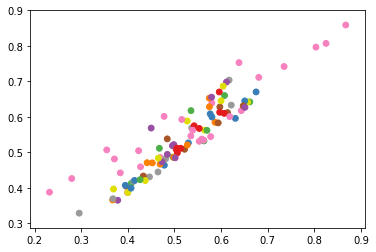

(100, 32, 32, 3)
Done fitting

Done predicting

[81  1 24 52 12 58 65 56 37 66 27 18 50 32 49 46 57 80 19 39 73 73 44 64 73
 43 22  6 40 53 82 28 29 76 14 17 72 47  4 51 55 73  7 16  8 23 35 59 70 67
  9 62 73 73 73 26 75 73 45 79 69 73 60 10 38 13 21 74 71 64 63 68 36 73 33
 48 73 11  2  3  5 25 73 77 31 73 73 42 15 34  0 61 54 74 78 73 59 41 20 30] (100, 3072)


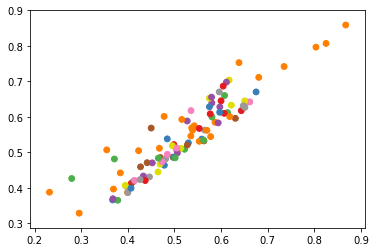

(100, 32, 32, 3)
Done fitting

Done predicting

[81 79 29 51 19 58 61 54 39 65 32 20 50 40  1 46 56 80 21 35 73 73 43 67 73
 45 18  7 38 59 82 33 27 76 14 17 72 47  8 48 53 73 10 24  4 22 41 57 68 66
  9 63 73 73 73 28 75 73 44 83 69 73 62 16 36 15 13 74 71 67 55 70 37 73 34
 52  2 12  3  5  6 26 73 77 25 73 73 49 11  0 31 60 64 74 78 73 57 42 23 30] (100, 3072)


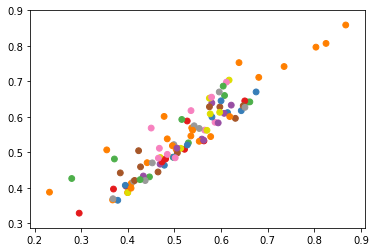

(100, 32, 32, 3)
Done fitting

Done predicting

[66 78 28 52 14 62 67 60 38 64 27 18 53 25 50 45 54 77 20 32 72 72 47  2 72
 46 17  8 36 56 82 31 29 76 11 15 74 48  6 49 51 72  9 19  5 23 43 59 71 70
 10 61 72 72 72 26 35 72 44 81 68 72 63 13 37 16 22 75 73  2 57 69  0 72 33
 55 83 12  1  4  3 39 72 80 21 72 72 41  7 40 30 58 65 84 79 72 59 42 24 34] (100, 3072)


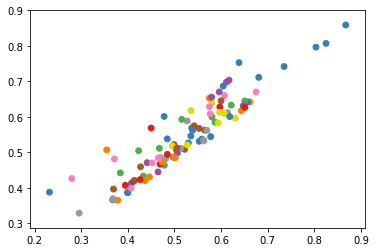

(100, 32, 32, 3)
Done fitting

Done predicting

[80 78 35 48 13 55 64 58 27 63 33 16 44 38 50 26 54 79 18 30  0 84 47 67  0
 46 19  7 37 53 82 31 34 75  9 17 72 49  8 51 56  0  6 22  2 23 39 59 69 66
  5 60  0  0  0 20 74  0 43 81 68  0 65 12 40 14 15 73 71 67 61 70 42  0 32
 52 83 10  1  4  3 24  0 76 25  0  0 41 11 36 29 62 57 85 77  0 59 45 21 28] (100, 3072)


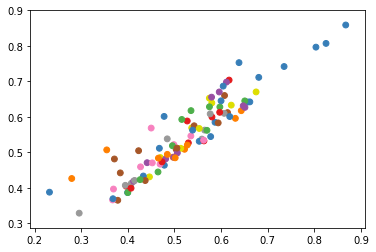

(100, 32, 32, 3)
Done fitting

Done predicting

[78 79 31 47 14 60 66 57 36 62 32 20 68 24 43  0 55 80 21 37 74  1 49 63 74
 48 17  7 40 53 84 34 28 76 15 18 72 50  5 46 54 74  8 19  2 25 38 58 71 67
 10 61 74 74 74 29 75 86 45 81 69 74 65 11 44 16  4 73 70 63 56 51 33 74 30
 52 83 13  9  3  6 42 74 82 26 74 74 39 12 22 35 59 64 85 77 74 58 41 23 27] (100, 3072)


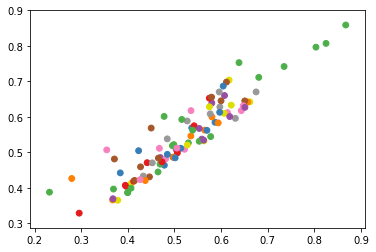

(100, 32, 32, 3)
Done fitting

Done predicting

[80 78 27 15 48 63 67 56 33 66 19 21 50 40 49 36 54 79 20 28 59 83 45 65 59
 46 14  5 37 57 82 30 41 75 16 17 73 47  4 52 53 59  9 22  7 24 34 85 69 68
  6 60 59 59 59 18 74 87 39 81 70 59 62 13 42 12  8  0 72 65 64 71 29 59 38
 51 84 11  2  3  1 25 59 76 26 59 59 43 10 35 31 61 55 86 77 59 58 44 23 32] (100, 3072)


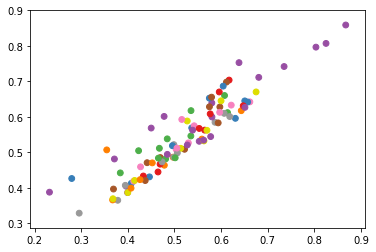

(100, 32, 32, 3)
Done fitting

Done predicting

[76 78 30 14 51 59 66 54 35 63 33 17 70 24 48 32 58 69 22 37 25 86 47 65 25
 46 19  9 38 57 82 23 31 75 11 16 72 50  5 49 53 25  7 18  6 20 40 85 68 67
 10 61 25 25 88 27 74 87 44 80 79 25 64 15 42 13  8 73 71 65 62 52 36 25 34
 55 83 12  4  2  1 41 25 81 29 25 25 43  3 39 26 60 56 84 77 25  0 45 21 28] (100, 3072)


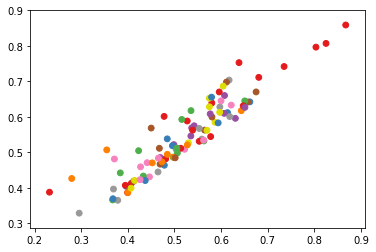

(100, 32, 32, 3)
Done fitting

Done predicting

[78 79 25 17 47 58 66 55 35 63 26 11 70 39 49 30 53 64 21 33 80 86 48 65 80
 45 18 10 42 59 84 22 32 76 15 16 72 50  0 43 51 80  7 19  4 23 38 57 69 68
  8 61 80 80 89 20 74 88 46 82 81 80 62 12 41 14  2 73 71 65 56 52 37 80 31
 54 85 13  5  6  3 29 80 75 24  1 80 44  9 36 34 60 67 87 77 80 83 40 27 28] (100, 3072)


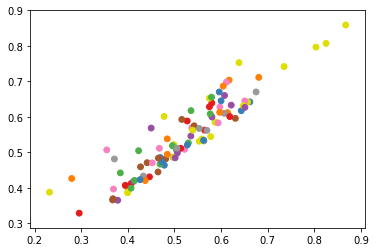

(100, 32, 32, 3)
Done fitting

Done predicting

[78 80 31 51  0 59 65 56 35 66 32 14 60 26 49 25 57 68 20 34 90 85 44 67 90
 46 17  3 38 50 84 22 27 77 13 19 73 47  8 48 52  1  9 21  4 28 39 86 72 69
  7 64  1  1 88 24 74 87 43 81 71  1 63 11 41 16  5 83 70 67 62 53 40  1 33
 54 82 15 10  6  2 36  1 76 18 89  1 42 12 37 29 61 55 75 79  1 58 45 23 30] (100, 3072)


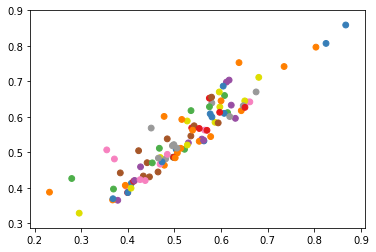

(100, 32, 32, 3)
Done fitting

Done predicting

[79 80 24 13 51 55 66 58 33 67 22 20 59 34 49 32  1 68 21 30 90 86 47 62 90
 46 23  4 39 57 85 31 29 77 16 19 73 50  8 48 56  9 11 27  2  0 40 81 70 69
 12 65 91  9 88 26 76 87 44 82 71  9 64 10 45 17  6 74 72 62 63 53 38  9 42
 52 83 15  5  7  3 18  9 75 28 89  9 43 14 35 37 61 54 84 78  9 60 41 25 36] (100, 3072)


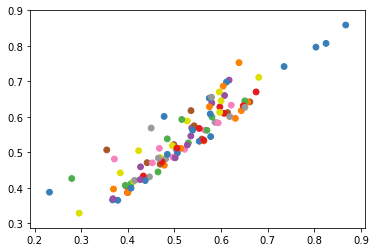

(100, 32, 32, 3)
Done fitting

Done predicting

[81 80 33 13 15 60 66 54 32 63 20 19 51 29 50 37 55 68 22 38 90 87 46 67 90
 45 16  6 43 59 84 25 27 78 11 18 73 49  8 48 53 75  9 26  4 24 41 56 70 69
 10 64 91 75 88 21 76  0 47 83 71 75 61  7 44 17  5 74 72 67 57 58 39 75 31
 52 85 12  2  3  1 28 92 77 34 89 75 40 14 35 30 62 65 86 79 75 82 42 23 36] (100, 3072)


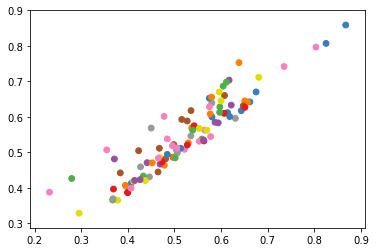

(100, 32, 32, 3)
Done fitting

Done predicting

[77 80 32 15 16 59 68 57 38 64 23 20 56 35 50 33  4 67 22 37 90 86 48 66 90
 44 24 10 39 54 83 29 34 76 17 19 73 52 13 49 53  6  3 25  9 26 46 81 71 69
 11 61 91  6 88 27 75 87 45 82 70  6 65 14 42 18  7 74 72 66 62 60 41  6 40
 51 84 12  2  5  1 21 92 78 30 89  6 43  8  0 31 63 55 85 79 93 58 47 28 36] (100, 3072)


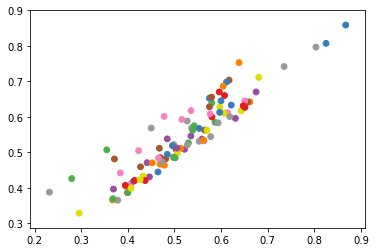

(100, 32, 32, 3)
Done fitting

Done predicting

[80 81 32 14 15 59 68 55 40 62 34 21 60 30 50 35 56 69 20 31 91 84 48 66 91
 47 19  4 33 51 86 24 27 78 13 16 74 46  8 49 57 89  1 17  5 29 43 58 71 70
 10 63 92 89 88 25 77 85 44 82 72 89 65 12 42 18  7 76 73 66 64 54 37 94 39
 53 87 11  3  6  2 22 93  0 26 90 89 41  9 38 28 61 52 75 79 67 83 45 23 36] (100, 3072)


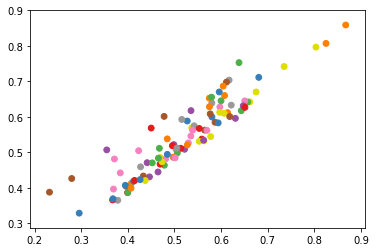

(100, 32, 32, 3)
Done fitting

Done predicting

[82 83 26 16 13 62 67 57 35 63 33 18 61 29 53 39 60 68 22 30 90 86 51  1 90
 46 17  9 42 50 85 31 34 80 12 23 72 49  7 47 56 87 10 20  4 25 45 59 69 73
  8 65 92 87 89 28 78 88 48 84 71 87 66 15 43 19  5 75 74 94 70 52 36 95 41
 54 32 14  3  6  2 21 77 79 27 91 87 40 11 37  0 64 55 76 81 93 58 44 24 38] (100, 3072)


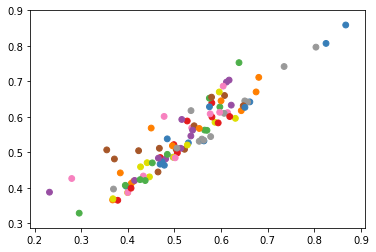

(100, 32, 32, 3)
Done fitting

Done predicting

[81 82 23  9 13 60 69 58 35 65 25 14 52 32 50 34 54 72 24 30 90 86 49 95 90
 47 20  5 39 48 85 29 26 79 15 19 75 55  6 46 53 94  4 21  3 28 42 62 71 70
 12 64 91 94 88 27 78 87 45 83 73 96 67 17 44 16  7 77 74 68 66 51 37 63 41
 56 84 10  8  1  2 18 92 80 36 89 94 43 11 38 31 61 57 76  0 93 59 40 22 33] (100, 3072)


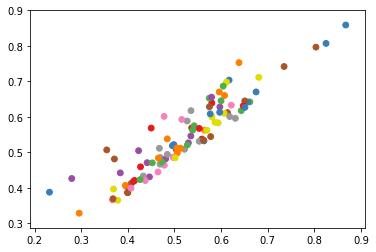

(100, 32, 32, 3)
Done fitting

Done predicting

[82 83 20 14 16 63 68 60 41 70 27 19 55 39 48 32 59  0 17 37 91 88 51 95 91
 42 23  5 44 53 87 25 34 79 11 18 29 45  7 50 57 97  6 22  9 31 49 64 73 69
  4 65 92 89 90 24 77 52 43 85 72 96 67 13 47 15  8 76 74 71 62 54 40 94 35
 56 86 12  1  3  2 21 84 78 30 80 97 36 10 38 28 66 58 75 81 93 61 46 26 33] (100, 3072)


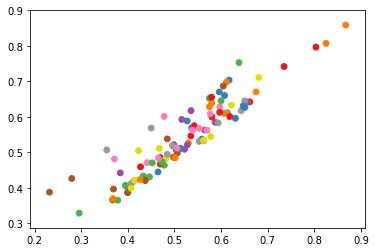

(100, 32, 32, 3)
Done fitting

Done predicting

[83 84  0 14 18 61 70 58 39 67 31 17 55 26 50 30 57 69 20 34 92 88 48 68 92
 46 19  3 36 51 86 25 32 81 12 21 75 49  8 43 53 98 15 22  5 27 42 63 72 71
 10 66 93 97 90 29 79  1 45 85 73 96 64 11 47 13  7 77 74 65 59 52 41 95 40
 54 87  9  2  6  4 23 78 80 28 91 89 38 16 37 33 62 56 76 82 94 60 44 24 35] (100, 3072)


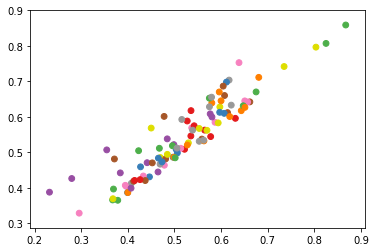

DONE


In [22]:

def key(mapped, c):
    for k in mapped.keys():
        if c in mapped[k]:
            return k 
    raise Error('no matching class')


def new_labels(pred, nr_clusters):
    
    '''mapped = {}
    for sc in np.arange(nr_clusters):
        tf = pred == sc
        index = np.where(tf)[0]
        mapped[sc] = index'''
    
    new_labels_perDatapoint = list(np.zeros(train_data.targets.shape))
    for i in np.arange(train_data.inputs.shape[0]):
        new_labels_perDatapoint[i] = pred[train_data.targets[i]]
    
    #print(new_labels_perDatapoint)
    with open("./spectral/clustering" + str(nr_clusters) + ".pkl", "wb") as g:
        pickle.dump(new_labels_perDatapoint, g, -1 )

    return new_labels_perDatapoint


for i in range(2,100):
    clustering(centroid, nr_clusters = i)

print('DONE')

(100, 32, 32, 3)
Done fitting

Done predicting

[ 0  0  0  5  5  0  0  0 16  0 15  3  0 19  0 11  0  0  0 13  0  0  0  0  0
  0  0  1 15  0  0 13 11  0 10  3  0  0  6 16  0  0  1 10  2  0  0  0  0  0
  6  0  0  0  0 18  0  0 18  0  0  0  0  9  0 10 12  0  0  0  0  0 18  0  0
  0  0 14  2 17  4  8  0  0 15  0  0 18  7 19 19  0  0  0  0  0  0  0  3 15] (100, 3072)


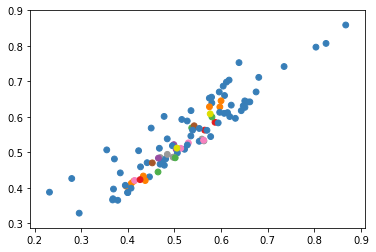

(100, 32, 32, 3)
Done fitting

Done predicting

[ 0  0  0  7  7  0  0  0  4 11 14 13 15  8 16  3 11  0 19  0  0  0  4  0  0
  3 16  5  9 11  0  7  3  0 10  2  0  0  2  0  4  0  5  0  2 16  5 17  0  0
 13  0  0  0  0  6  6  0 18  0  0  0  0 12  0 10 12  0 15  0  0  0  6  0 16
 16  0 19  1  1  1  8  0  0 14  0  0  6 10  0  0  9  0  0  0  0 17  0  1  0] (100, 4)


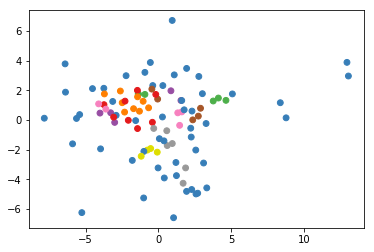

In [12]:


nr_clusters = 20
agg3 = SpectralClustering(n_clusters=nr_clusters, eigen_solver=None, random_state=None, affinity='rbf', n_neighbors=10, eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1, kernel_params=None, n_jobs=1)

centroid = np.array(centroid)
print(centroid.shape)
X = centroid.reshape(centroid.shape[0], centroid.shape[1]*centroid.shape[2]*centroid.shape[3])


agg3.fit(X)
print('Done fitting\n')

pred = agg3.fit_predict(X)
print('Done predicting\n')


from itertools import cycle, islice
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(pred) + 1))))

print(pred,X.shape)
plt.scatter(X[:, 0], X[:,1], s=34, color=colors[pred], marker='o')
plt.show()

#---------------------

agg3 = SpectralClustering(n_clusters=nr_clusters, eigen_solver=None, random_state=None, affinity='rbf', n_neighbors=10, eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1, kernel_params=None, n_jobs=1)

centroid = np.array(centroid)
print(centroid.shape)
X = centroid.reshape(centroid.shape[0], centroid.shape[1]*centroid.shape[2]*centroid.shape[3])


from sklearn.decomposition import PCA
pca = PCA(n_components=4, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=seed)
X = pca.fit_transform(X)

agg3.fit(X)
print('Done fitting\n')

pred = agg3.fit_predict(X)
print('Done predicting\n')


from itertools import cycle, islice
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(pred) + 1))))

print(pred,X.shape)
plt.scatter(X[:, 0], X[:,1], s=34, color=colors[pred], marker='o')
plt.show()
